# original data GCN

In [61]:
import sys
sys.path.append("../codes")

import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [10]:
from set_data_folder import make_train_data
from model import GCN
from train_test import train, test

from torch_geometric.utils import from_networkx
from torch_geometric.data import Data, DataLoader

In [3]:
# make train data folder
node = "100"
p_s = [
    {"kind": "barabasi", "node": [node], "p": ["2"]},
    {"kind": "noGrowth", "node": [node], "p": ["200"]},
    {"kind": "noAttach", "node": [node], "p": ["2"]},
    {"kind": "random", "node": [node], "p": ["0.04"]}
]

make_train_data(p_s, "../train_data/net").copy_data()

In [54]:
def data_from_adjlist(path, label):
    G = nx.read_adjlist(path)
    data = from_networkx(G)
#     data.x = torch.tensor([[d] for d in list(dict(nx.degree_centrality(G)).values())], dtype=torch.float)
#     data.x = torch.tensor([[float(d / 100)] for d in list(dict(G.degree()).values())])
    data.x = torch.tensor([[float(1)] for i in range(100)])
    data.y = torch.tensor([label])
    return data

def make_datasets(batch_size=32, split_rate=0.7):
    train_data_list = []
    test_data_list = []
    for i, file in enumerate(sorted(glob("/workspace/my_data/*"))):
        # adjlist のパスを取得
        paths = glob(file + "/*.adjlist")
        
        index = int(len(paths) * split_rate)
        train_data_list += [data_from_adjlist(p, i) for p in paths[:index]]
        test_data_list += [data_from_adjlist(p, i) for p in paths[index:]]
        
    train_data_loader = DataLoader(train_data_list, batch_size=batch_size, shuffle=True)
    test_data_loader = DataLoader(test_data_list, batch_size=batch_size, shuffle=False)
    
    return train_data_loader, test_data_loader

In [55]:
train_loader, test_loader = make_datasets(batch_size=100)

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [66]:
# set model and train
model = GCN(hidden_channels=64, num_classes=4, num_node_feature=1)
model.to(device)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.05, eps=1e-5)
criterion = torch.nn.CrossEntropyLoss()

train_accs = []
test_accs = []


for epoch in range(1, 20):
    train(model, train_loader, criterion, optimizer, device)
    train_acc = test(model, train_loader, device)
    test_acc = test(model, test_loader, device)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 001, Train Acc: 0.6844, Test Acc: 0.6928
Epoch: 002, Train Acc: 0.6224, Test Acc: 0.6202
Epoch: 003, Train Acc: 0.5994, Test Acc: 0.5947
Epoch: 004, Train Acc: 0.7357, Test Acc: 0.7385
Epoch: 005, Train Acc: 0.7221, Test Acc: 0.7268
Epoch: 006, Train Acc: 0.6474, Test Acc: 0.6460
Epoch: 007, Train Acc: 0.7144, Test Acc: 0.7123
Epoch: 008, Train Acc: 0.7240, Test Acc: 0.7203
Epoch: 009, Train Acc: 0.7411, Test Acc: 0.7425
Epoch: 010, Train Acc: 0.7201, Test Acc: 0.7297
Epoch: 011, Train Acc: 0.7457, Test Acc: 0.7493
Epoch: 012, Train Acc: 0.7428, Test Acc: 0.7443
Epoch: 013, Train Acc: 0.7450, Test Acc: 0.7468
Epoch: 014, Train Acc: 0.7394, Test Acc: 0.7380
Epoch: 015, Train Acc: 0.7451, Test Acc: 0.7473
Epoch: 016, Train Acc: 0.7430, Test Acc: 0.7458
Epoch: 017, Train Acc: 0.7450, Test Acc: 0.7482
Epoch: 018, Train Acc: 0.7450, Test Acc: 0.7478
Epoch: 019, Train Acc: 0.7455, Test Acc: 0.7477


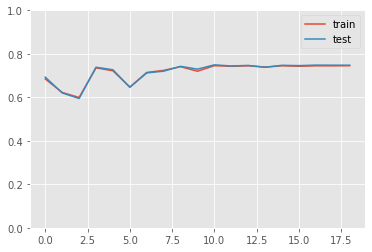

In [67]:
# 学習曲線の保存
plt.style.use('ggplot')
plt.plot(train_accs, label="train")
plt.plot(test_accs, label="test")
plt.ylim(0,1)
plt.legend()

In [37]:
data.x[:100]

tensor([[ 8],
        [12],
        [ 8],
        [ 8],
        [ 5],
        [ 7],
        [ 6],
        [ 6],
        [ 3],
        [ 9],
        [ 6],
        [ 4],
        [ 7],
        [ 3],
        [ 5],
        [ 3],
        [ 2],
        [ 9],
        [ 4],
        [ 6],
        [ 3],
        [ 9],
        [ 3],
        [ 2],
        [ 2],
        [ 6],
        [ 3],
        [ 2],
        [ 3],
        [ 9],
        [ 3],
        [ 5],
        [ 2],
        [ 5],
        [ 3],
        [ 2],
        [10],
        [ 9],
        [ 3],
        [ 2],
        [ 2],
        [ 2],
        [ 7],
        [ 2],
        [ 2],
        [ 5],
        [ 3],
        [ 5],
        [ 3],
        [ 2],
        [ 4],
        [ 2],
        [ 2],
        [ 9],
        [ 2],
        [ 3],
        [ 3],
        [ 2],
        [ 2],
        [ 2],
        [ 2],
        [ 3],
        [ 2],
        [ 2],
        [ 5],
        [ 4],
        [ 3],
        [ 3],
        [ 3],
        [ 2],
        [ 2],
      